In [50]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import warnings
warnings.filterwarnings("ignore")
import os
import matplotlib.pyplot as plt
import sys
import matplotlib.pylab as pylab
import cv2
import json
from io import BytesIO
import csv
import pathlib
from PIL import Image
import numpy as np
from tqdm import tqdm
from collections import namedtuple
from IPython.display import Image as display

In [51]:
def binary_to_pred(mask,img):
    for i in range(len(mask)):
        mask1=mask[i].astype('uint8')*255
        cnt, hierarchy = cv2.findContours(mask1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
        cv2.drawContours(img, cnt, -1, (0,255,0), 2)   
    return img

In [52]:
damage_name='scratch_latest'
config_file = '../configs/detectors/scratch_detector_latest_segm.py'
checkpoint_file = '../data/disk1/scratch_mmdet_gcp_model3/epoch_14.pth'


In [53]:
model = init_detector(config_file, checkpoint_file, device='cuda:0')

2020-12-20 21:33:40,881 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

missing keys in source state_dict: layer2.0.conv2.weight_diff, layer2.0.conv2.switch.weight, layer2.0.conv2.switch.bias, layer2.0.conv2.pre_context.weight, layer2.0.conv2.pre_context.bias, layer2.0.conv2.post_context.weight, layer2.0.conv2.post_context.bias, layer2.0.conv2.offset_s.weight, layer2.0.conv2.offset_s.bias, layer2.0.conv2.offset_l.weight, layer2.0.conv2.offset_l.bias, layer2.0.rfp_conv.weight, layer2.0.rfp_conv.bias, layer2.1.conv2.weight_diff, layer2.1.conv2.switch.weight, layer2.1.conv2.switch.bias, layer2.1.conv2.pre_context.weight, layer2.1.conv2.pre_context.bias, layer2.1.conv2.post_context.weight, layer2.1.conv2.post_context.bias, layer2.1.conv2.offset_s.weight, layer2.1.conv2.offset_s.bias, layer2.1.conv2.offset_l.weight, layer2.1.conv2.offset_l.bias, layer2.2.conv2.weight_diff, layer2.2.conv2.switch.weight, layer2

In [54]:
#Downloading scratched car image from web
os.system('wget https://i.ytimg.com/vi/b3k-DWb3NFA/maxresdefault.jpg')

0

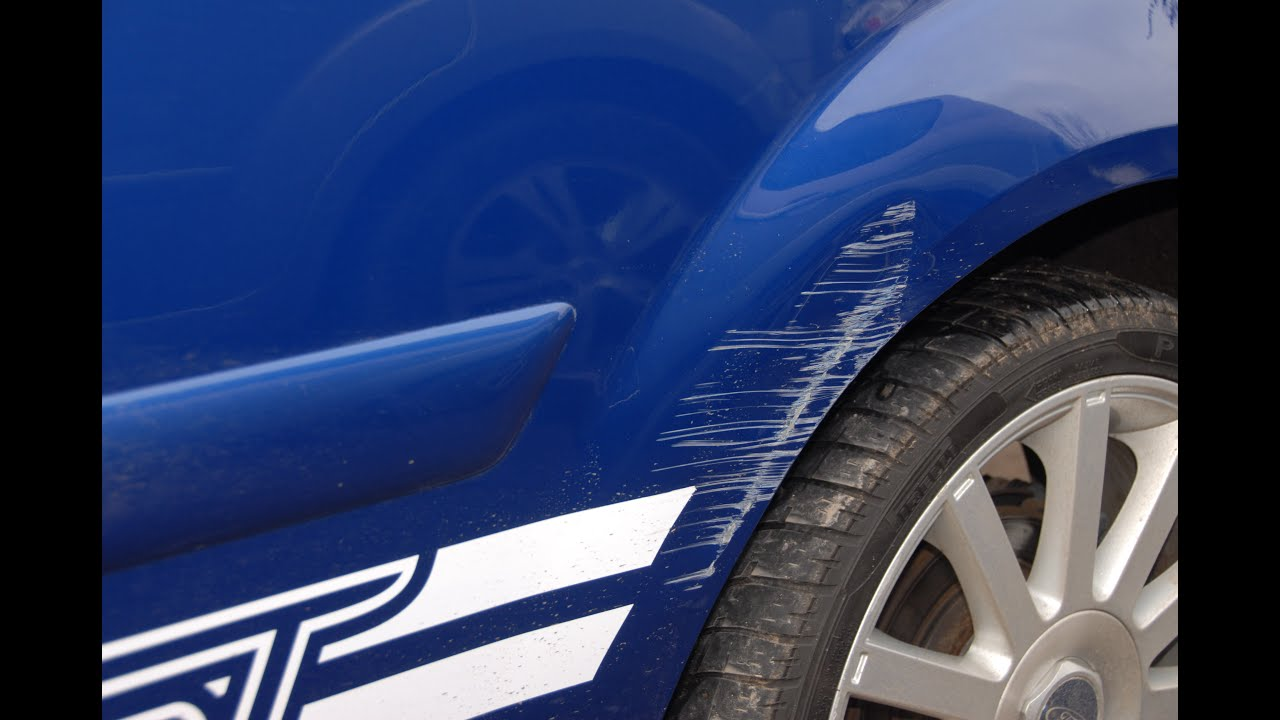

In [55]:
display(filename='maxresdefault.jpg',width = 600, height = 300) 

In [56]:
img=cv2.imread('maxresdefault.jpg')

In [57]:
#prediction on img using model
result = inference_detector(model, img)
out=show_result_pyplot(model, img, result)

In [58]:
#fetch bbox,binary mask,classes and scores
_,bbox,mask,classes,scores=out

In [59]:
#convert binary mask to poly 
pred_img=binary_to_pred(mask,img)

In [60]:
cv2.imwrite('pred_img.png',pred_img)

True

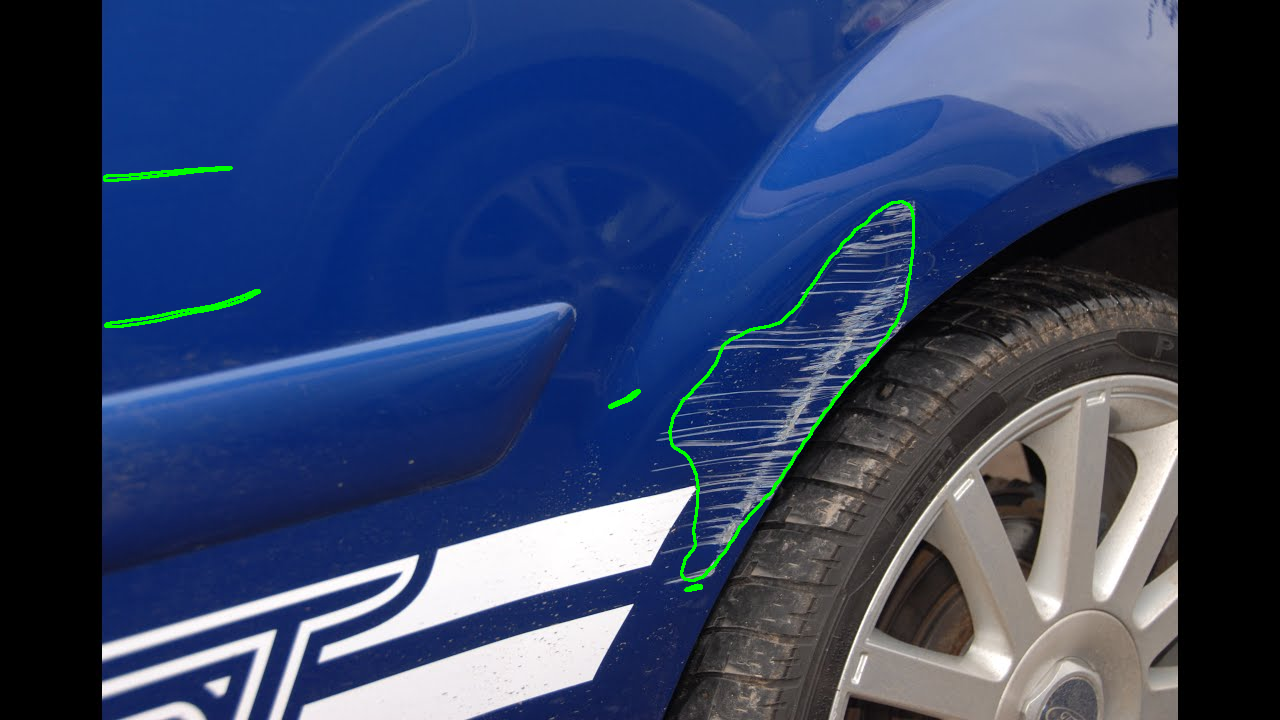

In [61]:
display(filename='pred_img.png',width = 600, height = 300) 